# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP@GRIP THE Spark Foundation #

## Task1:- Prediction Using Supervised ML (Level - Beginner) ##

#### Author - Sneha Nair ####

Predict the percentage of students based on no. of study hours using Linear Regression and also predict the score if a student studies for 9.25 hours per day.

**Dataset** - The dataset is Student Score Dataset.It has two Columns, one contains no.of study hours and the other one contains the marks scored by him. 

**Model** - Linear Regression is a machine learning algorithm based on supervised learning.It is a linear model e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x). It shows the relationship between two variables by fitting a line to the observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. Here, the study hours is explanatory wheras score is dependent variable. Score is linearly related to the Number of hours a Student Studies.



### Linear Regression

**Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**Exploring and understanding data***

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10) #to see first 10 rows of data.

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape #to find the shape of data

(25, 2)

**Observation**

There are 25 rows and two columns. The Independent Variable Column is Hours and the dependent Variable Column is Score 

In [4]:
data.describe() #data description

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Observation**

1. The average study hours is 5hrs
2. the average score is 51 
3. Minimum study hour is 1 and maximum study hours is 7.4hrs
4. Minimum score is 17 and maximum score is 95

In [5]:
data.info()  #info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Observation**

1. There are no missing values

In [6]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Observation**

1. there is a positive correlation between study hours and scores 


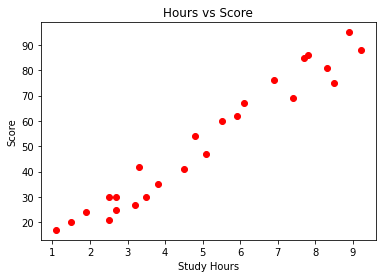

In [9]:
# distribution of scores

x = data.iloc[ : , :-1]
y = data.iloc[ : ,-1]
plt.plot(x,y,'ro')  

plt.title('Hours vs Score')  
plt.xlabel('Study Hours')  
plt.ylabel('Score')  
plt.show()

**Observation**

1. there is a linear relationship between study hours and scores 
2. as the hours increases , marks also increases

In [10]:
# Splitting the Dataset into 80:20


x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)


In [11]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

print("Training complete.")

Training complete.


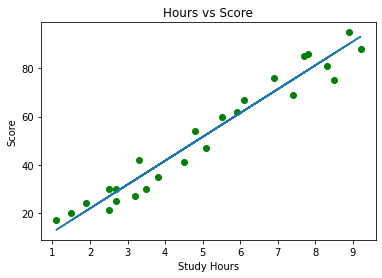

In [13]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y,color='green')
plt.plot(x, line);

plt.title('Hours vs Score')  
plt.xlabel('Study Hours')  
plt.ylabel('Score')  
plt.show()

In [14]:
print("Training Score: ",reg.score(x_train,y_train)*100)

Training Score:  95.15510725211553


***Making Predictions***
***Now that we have trained our algorithm, lets make some predictions.***

In [15]:
y_pred=reg.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Comparing ##

In [16]:
#Comparing the actual y_test set and predicted y_pred data we get
df = pd.DataFrame({'Actual': y_test, 'predicted': y_pred, 'Difference/Error': y_test - y_pred})
df

,Actual,predicted,Difference/Error
5,20,16.884145,3.115855
2,27,33.732261,-6.732261
19,69,75.357018,-6.357018
16,30,26.794801,3.205199
11,62,60.491033,1.508967


In [17]:
# mean_absolute_error
print("Mean Absolute Error : ",mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.183859899002975


**Mean absolute error : It measures the average magnitude of the errors in a set of predictions, without considering their direction.**

In [18]:
# mean_squared_error ( MSE Value)
print("Mean Squared Error ( MSE Value) :",mean_squared_error(y_test, y_pred))

Mean Squared Error ( MSE Value) : 21.5987693072174


**Mean squared error : It measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.**

In [20]:
# mean_squared_error ( RMSE Value)
print(" RMSE Value :",mean_squared_error(y_test, y_pred, squared=False))

 RMSE Value : 4.6474476121003665


**Root mean squared error : RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.**

In [21]:
#R2_Score
print("Prediction Score : ", r2_score(y_test, y_pred))

Prediction Score :  0.9454906892105356


**R2-score : It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.**

**Now, its time to predict the score when a student studies 9.25 hours per day***

In [22]:
hours = [[9.25]]
pred = reg.predict(hours)
print("Score obtained by the student if he studies for 9.25 hours/day = {}".format(pred[0]))

Score obtained by the student if he studies for 9.25 hours/day = 93.69173248737538
